In [4]:
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import bs4 #called `beautifulsoup4`, an html parser
import gensim#For word2vec, etc

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

In [5]:
import importlib
import helper_functions as fcns
import data_ingest as ing

In [245]:
importlib.reload(fcns)
importlib.reload(ing)

<module 'data_ingest' from '/Users/daminisharma/Dropbox/Harris MSCAPP/2019-20_Q3_Spring/Content Analysis/american-prison-writing_nlp/analysis/data_ingest.py'>

In [8]:
data_directory = '../data/'
filename = 'APW_final.csv'
df = ing.load_prep_data(data_directory+filename)
df = ing.agg_groups(df, 'race','race_agg',['African American','Latina/o / Hispanic','Multiracial','No information','White (non-Hispanic)'])
df = ing.agg_groups(df, 'gender','gender_agg',['Female','Male','No Information'])
df = ing.norm_text(df)
df = ing.norm_sent(df)
df = ing.norm_words(df)
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender,race_agg,gender_agg,tokenized_text,normalized_text,tokenized_sents,normalized_sents
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal...","[[A, PERSON, CANNOT, BECOME], [WHO, THEY, NEED...","[[person], [need], [remaining], [], [], [wesle..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu...","[[It, is, Good, Justice, is, Blind, Because, S...","[[good, justice, blind, like, things], [wesley..."


# Word2Vec

In [14]:
w2v = fcns.word_2_vec(df)

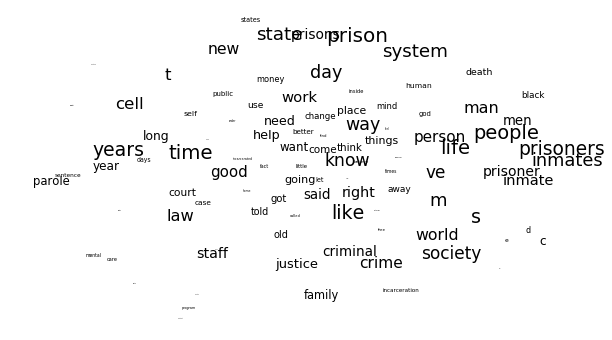

In [152]:
fcns.visualize_W2V(w2v,numWords=100,n_components=80)

In [159]:
most_similar_table = fcns.most_similar_table(w2v,['people','black','white','life','help','god','male','female'])
most_similar_table

,people,black,white,life,help,god,male,female
0,"(individuals, 0.75)","(white, 0.95)","(black, 0.95)","(forever, 0.72)","(needed, 0.87)","(christ, 0.89)","(female, 0.91)","(assaulted, 0.93)"
1,"(especially, 0.71)","(color, 0.83)","(hispanic, 0.88)","(die, 0.71)","(need, 0.86)","(lord, 0.87)","(hispanic, 0.9)","(male, 0.91)"
2,"(communities, 0.69)","(hispanic, 0.83)","(panther, 0.84)","(lives, 0.7)","(helping, 0.82)","(jesus, 0.84)","(males, 0.89)","(sexually, 0.85)"
3,"(americans, 0.68)","(panther, 0.82)","(brown, 0.83)","(possibility, 0.7)","(teach, 0.81)","(forgiveness, 0.84)","(sexually, 0.87)","(cos, 0.83)"
4,"(lives, 0.68)","(african, 0.82)","(male, 0.83)","(meaning, 0.7)","(able, 0.81)","(words, 0.83)","(latino, 0.86)","(hispanic, 0.82)"
5,"(tend, 0.68)","(mexican, 0.78)","(mexican, 0.83)","(experiences, 0.7)","(trust, 0.8)","(faith, 0.82)","(predominantly, 0.84)","(assaulting, 0.81)"
6,"(vast, 0.68)","(latino, 0.78)","(supremacists, 0.82)","(choices, 0.69)","(willing, 0.79)","(love, 0.8)","(white, 0.83)","(abused, 0.8)"
7,"(convicts, 0.68)","(male, 0.77)","(latino, 0.81)","(possibly, 0.69)","(encourage, 0.79)","(bless, 0.8)","(abused, 0.82)","(supremacists, 0.79)"
8,"(minority, 0.67)","(blacks, 0.77)","(supremacy, 0.79)","(future, 0.69)","(educate, 0.78)","(word, 0.8)","(assaulted, 0.82)","(verbally, 0.79)"
9,"(places, 0.67)","(whites, 0.76)","(collar, 0.79)","(remain, 0.69)","(attention, 0.78)","(mercy, 0.8)","(whites, 0.8)","(raped, 0.79)"


In [136]:
fcns.most_similar_analogy(['life'],['black'],['white'],w2v)

,life+black-white,life+white-black
0,"(lives, 0.7255401611328125)","(possibility, 0.6888395547866821)"
1,"(meaning, 0.7151515483856201)","(die, 0.6870564818382263)"
2,"(future, 0.7126591205596924)","(forever, 0.674716591835022)"
3,"(forever, 0.7009782195091248)","(eventually, 0.6692510843276978)"
4,"(reality, 0.6982024312019348)","(possibly, 0.6606379747390747)"
5,"(experiences, 0.6958403587341309)","(chance, 0.646094024181366)"
6,"(remain, 0.6865257620811462)","(lifetime, 0.6373839974403381)"
7,"(choices, 0.6826993227005005)","(embarking, 0.6366658210754395)"
8,"(hope, 0.6813963651657104)","(painful, 0.6361178159713745)"
9,"(circumstances, 0.6772337555885315)","(choices, 0.6352708339691162)"


In [127]:
fcns.most_similar_analogy(['police'],['black'],['white'],w2v)

,police+black-white,police+white-black
0,"(enforcement, 0.6932991147041321)","(serino, 0.6518771648406982)"
1,"(racist, 0.6670251488685608)","(nypd, 0.6370021104812622)"
2,"(elected, 0.6538706421852112)","(gunning, 0.6230349540710449)"
3,"(prosecutors, 0.6480627655982971)","(enforcement, 0.6211321949958801)"
4,"(municipality, 0.636898934841156)","(co, 0.615379810333252)"
5,"(union, 0.6366269588470459)","(correction, 0.6005938053131104)"
6,"(corruption, 0.630424976348877)","(unprofessionalism, 0.5994969606399536)"
7,"(corrupt, 0.6242858171463013)","(cops, 0.5981272459030151)"
8,"(legislators, 0.6238316297531128)","(dominic, 0.5970827341079712)"
9,"(lawyers, 0.6184043884277344)","(sis, 0.5930914878845215)"


# Doc2Vec

In [103]:
keywords = ['criminal', 'justice', 'health', 'black', 'white', 'man', 'woman', 'inmate','guard','mental','god','law']

d2v = fcns.d2v(df,keywords)


/Users/daminisharma/miniconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


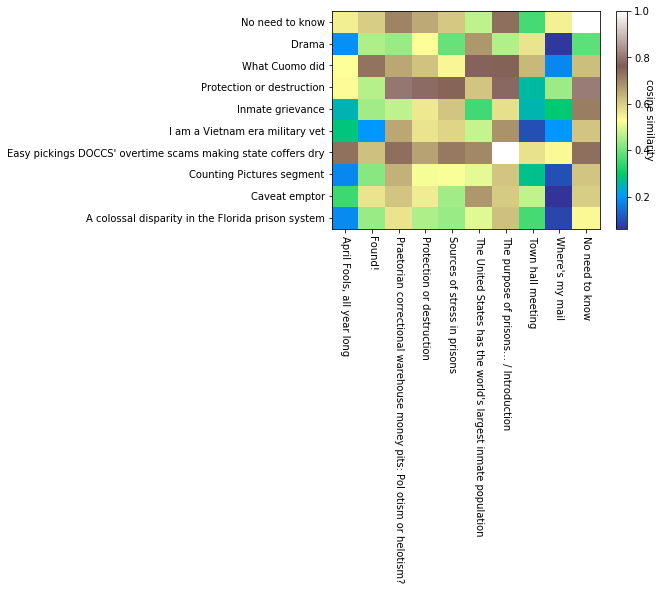

In [169]:
#fcns.d2v_similar_heatmap(d2v,df,[d2v['police']-d2v['white']+d2v['black']],[d2v['police']-d2v['black']+d2v['white']])
#fcns.d2v_similar_heatmap(d2v,df,[d2v['racism']-d2v['white']+d2v['black']],[d2v['racism']-d2v['black']+d2v['white']])
#fcns.d2v_similar_heatmap(d2v,df,[d2v['doctor']-d2v['white']+d2v['black']],[d2v['doctor']-d2v['black']+d2v['white']])

targetDocs1, targetDocs2 = fcns.d2v_similar_heatmap(d2v,df,[d2v['police']-d2v['white']+d2v['black']],[d2v['police']-d2v['black']+d2v['white']])




In [172]:
for x in targetDocs1:
    print(x)

April Fools, all year long
Found!
Praetorian correctional warehouse money pits: Pol otism or helotism?
Protection or destruction
Sources of stress in prisons
The United States has the world's largest inmate population
The purpose of prisons… / Introduction
Town hall meeting
Where's my mail
No need to know


In [173]:
for x in targetDocs2:
    print(x)

A colossal disparity in the Florida prison system
Caveat emptor
Counting Pictures segment
Easy pickings DOCCS' overtime scams making state coffers dry
I am a Vietnam era military vet
Inmate grievance
Protection or destruction
What Cuomo did
Drama
No need to know


In [175]:
#The purpose of prisons… / Introduction

#Easy pickings DOCCS' overtime scams making state coffers dry

sklearn.metrics.pairwise.cosine_similarity(d2v.docvecs['The purpose of prisons… / Introduction'].reshape(1, -1), d2v.docvecs["Easy pickings DOCCS' overtime scams making state coffers dry"].reshape(1, -1))




array([[0.78619087]], dtype=float32)

In [176]:
df.head(2)

,url,title,text,date_written,pages,relation_to_prison,race,state,gender,race_agg,gender_agg,tokenized_text,normalized_text,tokenized_sents,normalized_sents,tokenized_words,normalized_words,TaggedTexts
0,/islandora/object/apw%3A12341395?solr_nav%5Bid...,A person cannot become who they need to be by ...,A PERSON CANNOT BECOME WHO THEY NEED TO BE BY...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remain, wesley, purkey, federal...","[[A, PERSON, CANNOT, BECOME], [WHO, THEY, NEED...","[[person], [need], [remaining], [], [], [wesle...","[A, PERSON, CANNOT, BECOME, WHO, THEY, NEED, T...","[person, need, remaining, wesley, purkey, fede...","([person, need, remaining, wesley, purkey, fed..."
1,/islandora/object/apw%3A12341549?solr_nav%5Bid...,It is good justice is blind because she would ...,It is Good Justice is Blind Because She Would ...,2014-03-18,2 pages,Death Row Prisoner,White (non-Hispanic),Indiana,Male,White (non-Hispanic),Male,"[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, thing, wesley, pu...","[[It, is, Good, Justice, is, Blind, Because, S...","[[good, justice, blind, like, things], [wesley...","[It, is, Good, Justice, is, Blind, Because, Sh...","[good, justice, blind, like, things, wesley, p...","([good, justice, blind, like, things, wesley, ..."


In [177]:
black_essays = df[df['race_agg']=='African American']

In [178]:
white_essays = df[df['race_agg']=='White (non-Hispanic)']

In [180]:
black_essays.shape

(673, 18)

In [181]:
white_essays.shape

(861, 18)

In [182]:
type(targetDocs2)

pandas.core.series.Series

In [184]:
black_essays['title'].sample(20)

1626    The inmate and the prison guard or the night t...
2035     Reflections from the cement coffin June 17, 2013
983                        Life without parole is torture
1867                                     We can't breathe
804                                 I'm a prisoner in the
2001                                    Cruel and unusual
1208                                Paroled into paradise
200                      Aramark food corporation scandal
2062    The rhetoric of imprisonment and the reality o...
199                                              Apostasy
341     Celldweller journal: Words alone aren't enough...
1554                                       The black robe
2039    Reflections from the cement coffin June 6, 201...
1424                                         Slavery daze
1393                                      Sanctum of evil
360                                Chronicles of February
596     For as long as I could remember, life has alwa...
944           

In [243]:
sample_black = black_essays['title'].sample(10,random_state=0)
sample_white = white_essays['title'].sample(10,random_state=0)

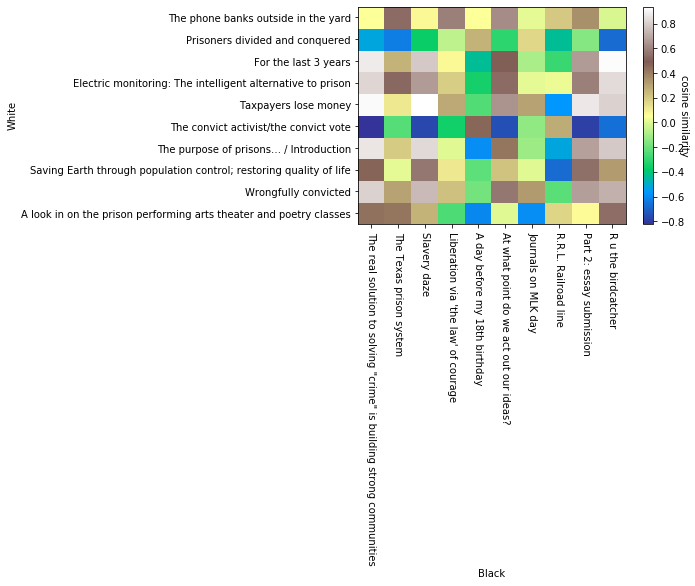

In [246]:
fcns.heatmap_doc_similar("Black",sample_black,"White",sample_white,d2v)


In [209]:
for x in sample_black:
    print(x)

The real solution to solving "crime" is building strong communities
The Texas prison system
Slavery daze
Liberation via 'the law' of courage
A day before my 18th birthday
At what point do we act out our ideas?
Journals on MLK day
R.R.L. Railroad line
Part 2: essay submission
R u the birdcatcher
Liberating toxic masculinity (a prisoner's narrative)
Political education deprived
Holiday blues 'n blahs
It was all a dream
Governmental intentional infliction of oppressive injustice


In [234]:
#d2v.most_similar( [ d2v.docvecs['Part 2: essay submission'] ], topn=10) 

In [210]:
for x in sample_white:
    print(x)

A look in on the prison performing arts theater and poetry classes
Wrongfully convicted
Saving Earth through population control; restoring quality of life
The purpose of prisons… / Introduction
The convict activist/the convict vote
Taxpayers lose money
Electric monitoring: The intelligent alternative to prison
For the last 3 years
Prisoners divided and conquered
The phone banks outside in the yard
I write under the pen name
My story in short form
I am writing this from my cell
My name is Vincent Calamia
Just a little pregnant


In [235]:
#d2v.most_similar( [ d2v.docvecs['Taxpayers lose money'] ], topn=10) 



In [236]:
#d2v.most_similar( [ d2v.docvecs['Part 2: essay submission'] ], topn=10) 

In [237]:

#d2v.most_similar( [ d2v.docvecs['The convict activist/the convict vote'] ], topn=10) 

In [238]:
#d2v.most_similar( [ d2v.docvecs['Slavery daze'] ], topn=10) 

In [239]:


#d2v.most_similar( [ d2v.docvecs['Taxpayers lose money'] ], topn=10) 

In [253]:
title1 = "Slavery daze"
title2 = "The phone banks outside in the yard"
title3 = "Taxpayers lose money"
title4 = "The convict activist/the convict vote"

print(d2v.most_similar( [ d2v.docvecs[title1] ], topn=10) )
print("\n")
print(d2v.most_similar( [ d2v.docvecs[title2] ], topn=10) )

[('trajectory', 0.9267054796218872), ('enslaved', 0.915256142616272), ('capturing', 0.9094575643539429), ('greedy', 0.9061924815177917), ('rich', 0.9006221890449524), ('sadists', 0.8964606523513794), ('rebirth', 0.8911822438240051), ('uniquely', 0.8902574777603149), ('instilled', 0.8874942064285278), ('fighters', 0.8862932920455933)]


[('mick', 0.984224796295166), ('procession', 0.983277440071106), ('stupor', 0.9820598363876343), ('cabin', 0.9796024560928345), ('dough', 0.9783211350440979), ('brakes', 0.9781836867332458), ('leftovers', 0.9746296405792236), ('bic', 0.9741660952568054), ('propped', 0.9740166068077087), ('rotted', 0.9738188982009888)]


In [258]:
dict1 = {}
dict1[title1] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title1] ], topn=10)]
dict1["NEUTRAL: "+title2] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title2] ], topn=10)]
dict1["POSITIVE: "+title3] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title3] ], topn=10)]
dict1["NEGATIVE: "+title4] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title4] ], topn=10)]

dict_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict1.items() ]))

In [259]:
dict_df

,Slavery daze,NEUTRAL: The phone banks outside in the yard,POSITIVE: Taxpayers lose money,NEGATIVE: The convict activist/the convict vote
0,trajectory,mick,cited,allocation
1,enslaved,procession,damages,termed
2,capturing,stupor,misrepresented,allocating
3,greedy,cabin,petitions,soto
4,rich,dough,milked,spartan
5,sadists,brakes,subsequent,ineffectual
6,rebirth,leftovers,statute,needlessly
7,uniquely,bic,dismissal,reborn
8,instilled,propped,pursuant,kmk
9,fighters,rotted,accord,vo


In [251]:
 
    
[(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title1] ], topn=10)]

['trajectory',
 'enslaved',
 'capturing',
 'greedy',
 'rich',
 'sadists',
 'rebirth',
 'uniquely',
 'instilled',
 'fighters']

In [212]:
male_essays = df[df['gender_agg']=='Male']
female_essays = df[df['gender_agg']=='Female']


In [226]:
sample_male = male_essays['title'].sample(10,random_state=0)
sample_female = female_essays['title'].sample(10,random_state=0)

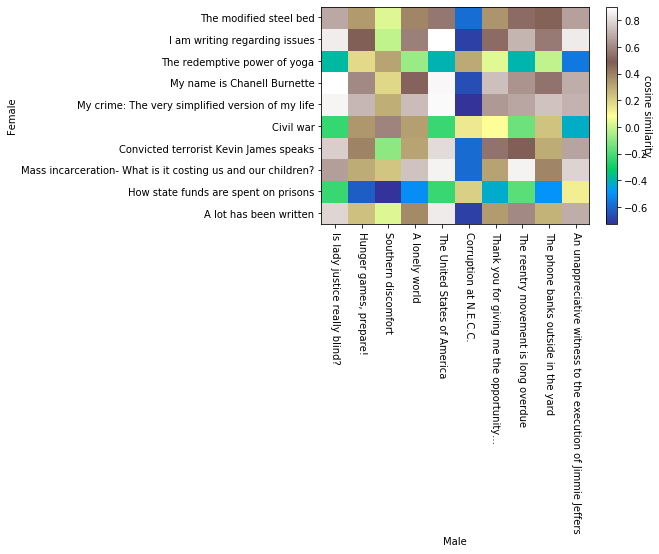

In [249]:
fcns.heatmap_doc_similar("Male",sample_male,"Female",sample_female,d2v)

In [228]:
for x in sample_male:
    print(x)

Is lady justice really blind?
Hunger games, prepare!
Southern discomfort
A lonely world
The United States of America
Corruption at N.E.C.C.
Thank you for giving me the opportunity...
The reentry movement is long overdue
The phone banks outside in the yard
An unappreciative witness to the execution of Jimmie Jeffers


In [229]:
for x in sample_female:
    print(x)

A lot has been written
How state funds are spent on prisons
Mass incarceration- What is it costing us and our children?
Convicted terrorist Kevin James speaks
Civil war
My crime: The very simplified version of my life
My name is Chanell Burnette
The redemptive power of yoga
I am writing regarding issues
The modified steel bed


In [260]:
#title1 = "Corruption at N.E.C.C."
title1 = "My name is Chanell Burnette"
title2 = "Southern discomfort"
title3 = "The United States of America"
title4 = "Corruption at N.E.C.C."
#title2 = "A lot has been written"
#title2 = "In every developed and even most semi-developed countries there exists a formal "justice" system"

print(d2v.most_similar( [ d2v.docvecs[title1] ], topn=10) )
print("\n")
print(d2v.most_similar( [ d2v.docvecs[title2] ], topn=10) )

[('adequate', 0.9215265512466431), ('provider', 0.9175248146057129), ('inadequate', 0.9097712635993958), ('patients', 0.8990650773048401), ('appointments', 0.8905980587005615), ('patient', 0.8863116502761841), ('concerns', 0.8861064910888672), ('provided', 0.884499192237854), ('inflated', 0.8823788166046143), ('continual', 0.8786547780036926)]


[('infect', 0.9722485542297363), ('puppet', 0.9678758382797241), ('lame', 0.9677397608757019), ('forlorn', 0.9664930105209351), ('sacrificed', 0.9639573097229004), ('nichiren', 0.963822066783905), ('betray', 0.9632946252822876), ('abortion', 0.9616525769233704), ('pessimistic', 0.961006760597229), ('inspiration', 0.9602154493331909)]


In [261]:
dict1 = {}
dict1[title1] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title1] ], topn=10)]
dict1["NEUTRAL: "+title2] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title2] ], topn=10)]
dict1["POSITIVE: "+title3] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title3] ], topn=10)]
dict1["NEGATIVE: "+title4] = [(x[0]) for x in d2v.most_similar( [ d2v.docvecs[title4] ], topn=10)]

dict_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict1.items() ]))

In [262]:
dict_df

,My name is Chanell Burnette,NEUTRAL: Southern discomfort,POSITIVE: The United States of America,NEGATIVE: Corruption at N.E.C.C.
0,adequate,infect,rethink,notices
1,provider,puppet,rein,seperated
2,inadequate,lame,vetting,accompanying
3,patients,forlorn,upd,bccx
4,appointments,sacrificed,ethnographic,seized
5,patient,nichiren,accorded,thier
6,concerns,betray,menaces,additionally
7,provided,abortion,illiteracy,surprisingly
8,inflated,pessimistic,allocating,venture
9,continual,inspiration,registries,hastily
